<a href="https://colab.research.google.com/github/MidoMigo1/Egyptian_ID_Detection/blob/main/testing_yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounting google drive

In [9]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


clone YOLO and install requirments

In [10]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17075, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 17075 (delta 19), reused 7 (delta 7), pack-reused 17049 (from 2)
Receiving objects: 100% (17075/17075), 15.69 MiB | 18.97 MiB/s, done.
Resolving deltas: 100% (11724/11724), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 901.3/901.3 kB 15.0 MB/s eta 0:00:00


Linking Dataset

In [11]:
import os

# Path to your dataset in Google Drive
drive_dataset_path = "/content/drive/MyDrive"

# Verify that images and labels folders exist
assert os.path.exists(f"{drive_dataset_path}/images"), "Images folder not found!"
assert os.path.exists(f"{drive_dataset_path}/labels"), "Labels folder not found!"

# Create symbolic links in the Colab environment
os.makedirs("/content/yolov5/dataset", exist_ok=True)
os.symlink(f"{drive_dataset_path}/images", "/content/yolov5/dataset/images")
os.symlink(f"{drive_dataset_path}/labels", "/content/yolov5/dataset/labels")

print("Dataset linked successfully.")


Dataset linked successfully.


creating data.yaml file

In [18]:
data_yaml_content = """
train: /content/drive/MyDrive/images
val: /content/drive/MyDrive/images

nc: 5
names: ['Name', 'DocumentType', 'Address', 'NationalID', 'BirthDate']
"""

with open("data.yaml", "w") as file:
    file.write(data_yaml_content)

print("data.yaml created.")


data.yaml created.


In [19]:
!cat data.yaml


train: /content/drive/MyDrive/images
val: /content/drive/MyDrive/images

nc: 5
names: ['Name', 'DocumentType', 'Address', 'NationalID', 'BirthDate']


In [20]:
!nano data.yaml


/bin/bash: line 1: nano: command not found


training

In [21]:
import os
os.environ['WANDB_MODE'] = 'disabled'

!python train.py --img 640 --batch 16 --epochs 50 --data data.yaml --weights yolov5s.pt


wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-12-19 07:30:19.324633: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-19 07:30:19.365703: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-19 07:30:19.377138: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=F

test the model


In [22]:
!find /content -name "best.pt"


/content/yolov5/runs/train/exp2/weights/best.pt
find: ‘/content/drive/.Encrypted/.shortcut-targets-by-id/1by53SKirShnIOexLFjAx4qbpl7elufNo/dataset’: No such file or directory


In [26]:
!ls /content/drive/MyDrive/


 1.jpg		        Capture.PNG	   images	     'Research for AI model.gdoc'
 2.jpg		        cnn_ocr_model.h5   labels	      test_image.jpg
'Ahmed Maged (2).pdf'  'Colab Notebooks'   labels.cache
 archive.zip	        dataset		   National_ID.xlsx


In [35]:
!python detect.py --weights runs/train/exp2/weights/best.pt --img 640 --conf 0.25 --source /content/drive/MyDrive/test_image.jpg --save-txt --save-conf


detect: weights=['runs/train/exp2/weights/best.pt'], source=/content/drive/MyDrive/test_image.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-389-ge62a31b6 Python-3.10.12 torch-2.5.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/test_image.jpg: 448x640 1 Name, 1 DocumentType, 1 Address, 1 NationalID, 1 BirthDate, 268.2ms
Speed: 2.3ms pre-process, 268.2ms inference, 1.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp6
1 labels saved to runs/detect/exp6/labels


Display image

In [28]:
from IPython.display import Image, display

# Show a detected image
display(Image(filename='/content/drive/MyDrive/test_image.jpg'))


FileNotFoundError: [Errno 2] No such file or directory: '/content/yolov5/runs/detect/exp/test_image.jpg'

install easy ocr


In [29]:
!pip install easyocr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 22.1 MB/s eta 0:00:00


detect using easyOCR

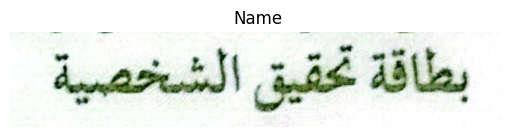

Name: الث خومية (Confidence: 0.08)


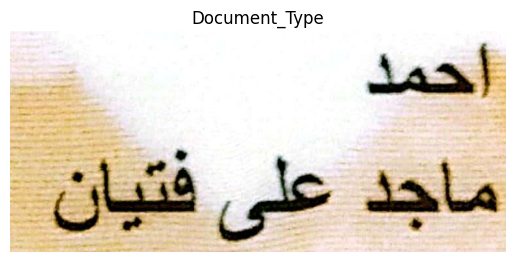

Document_Type: احمد (Confidence: 0.33)


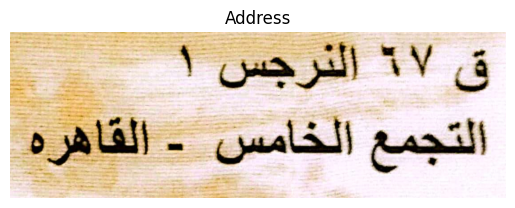

Address: ق ٦٧ (Confidence: 0.47)


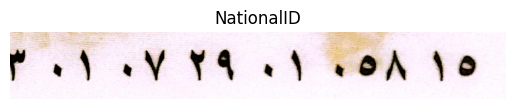

NationalID: ٠١ ٢٩ ٠٧ ٠١ ٣ (Confidence: 0.69)


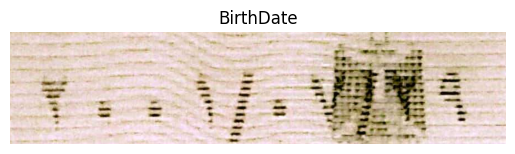

BirthDate: = ذ ؟ (Confidence: 0.37)


In [40]:
import cv2
from easyocr import Reader
import matplotlib.pyplot as plt
import os

# Initialize EasyOCR for Arabic
reader = Reader(['ar'], gpu=True)

# Paths
image_path = '/content/drive/MyDrive/test_image.jpg'
label_path = '/content/yolov5/runs/detect/exp6/labels/test_image.txt'

# Output directory for debugging cropped regions
output_dir = "/content/cropped_regions"
os.makedirs(output_dir, exist_ok=True)

# Load the image
image = cv2.imread(image_path)
img_h, img_w, _ = image.shape

# Load YOLO detection results
with open(label_path, 'r') as f:
    detections = f.readlines()

# Define class names (from data.yaml)
class_names = ['Document_Type', 'Name', 'Address', 'NationalID', 'BirthDate']

# Process each detection
for detection in detections:
    parts = detection.strip().split()
    class_id, x_center, y_center, width, height, confidence = map(float, parts)

    # Convert normalized coordinates to pixel values
    x_center, y_center, width, height = (
        x_center * img_w, y_center * img_h, width * img_w, height * img_h
    )
    xmin = max(0, int(x_center - width / 2))
    ymin = max(0, int(y_center - height / 2))
    xmax = min(img_w, int(x_center + width / 2))
    ymax = min(img_h, int(y_center + height / 2))

    # Crop the detected region
    cropped_region = image[ymin:ymax, xmin:xmax]

    # Visualize the cropped region (optional)
    plt.imshow(cv2.cvtColor(cropped_region, cv2.COLOR_BGR2RGB))
    plt.title(class_names[int(class_id)])
    plt.axis('off')
    plt.show()

    # Preprocessing: Convert to grayscale
    cropped_gray = cv2.cvtColor(cropped_region, cv2.COLOR_BGR2GRAY)

    # Enhance contrast
    alpha = 1.5  # Contrast control
    beta = 20    # Brightness control
    cropped_contrast = cv2.convertScaleAbs(cropped_gray, alpha=alpha, beta=beta)

    # Apply adaptive thresholding
    cropped_binary = cv2.adaptiveThreshold(
        cropped_contrast, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
    )

    # Morphological operations to refine text
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
    cropped_binary = cv2.dilate(cropped_binary, kernel, iterations=1)
    cropped_binary = cv2.erode(cropped_binary, kernel, iterations=1)

    # Save preprocessed region for debugging
    cv2.imwrite(f"{output_dir}/{class_names[int(class_id)]}_preprocessed.jpg", cropped_binary)

    # Recognize text in the preprocessed region
    text = reader.readtext(cropped_binary)
    label = class_names[int(class_id)]

    # Output the recognized text and confidence
    if text:
        print(f"{label}: {text[0][1]} (Confidence: {text[0][2]:.2f})")
    else:
        print(f"{label}: No text detected.")


save model


In [ ]:
!cp runs/train/exp/weights/best.pt /content/drive/MyDrive/best.pt
print("Model saved to Google Drive.")

